###Este código carga el dataset, lo preprocesa, divide los datos en entrenamiento y prueba, aplica Bag of Words para la vectorización, entrena un modelo Naive Bayes, realiza predicciones y evalúa el modelo con diferentes métricas. Además, genera una matriz de confusión en forma de mapa de calor y una tabla con las métricas principales.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import google.colab.drive as drive

In [5]:
# Montar Drive
drive.mount('/content/drive')
# 2. Definir ruta de la carpeta en Drive
ruta_carpeta = "/content/drive/MyDrive/_IABD/_proyectos_python/mia/ud4_PLN/practicas/practicas3_1_spam/"
!ls "/content/drive/MyDrive/_IABD/_proyectos_python/mia/ud4_PLN/practicas/3_1_spam/"

Mounted at /content/drive
'PLN - P3.1 _ Creación de un filtro de spam.pdf'   SMSSpamCollection.txt
 practica3_1_spam.ipynb				   Untitled0.ipynb


In [6]:
ruta_archivo_sms = "/content/drive/MyDrive/_IABD/_proyectos_python/mia/ud4_PLN/practicas/3_1_spam/SMSSpamCollection.txt"

In [7]:
# Cargar los datos
df = pd.read_table(ruta_archivo_sms, sep='\t', names=['label', 'sms_message'])

In [8]:
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Convertir etiquetas a valores numéricos
df['label'] = df.label.map({'ham': 0, 'spam': 1})

In [10]:
df.shape

(5572, 2)

In [11]:
# División del conjunto de datos
test_size = 0.2  # Separamos el 20% para pruebas
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], df['label'], test_size=test_size, random_state=1)

In [12]:
# Aplicar Bag of Words
count_vector = CountVectorizer(stop_words='english')
X_train_counts = count_vector.fit_transform(X_train)
X_test_counts = count_vector.transform(X_test)

In [13]:
# Entrenar modelo Naive Bayes
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_counts, y_train)

MultinomialNB()

In [14]:
# Predicciones
predictions = naive_bayes.predict(X_test_counts)

In [15]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

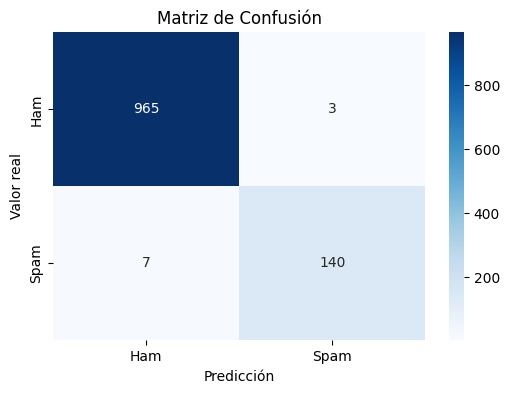

In [16]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

In [17]:
# Mostrar métricas
table_metrics = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Valor': [accuracy, precision, recall, f1]
})
print(table_metrics)

     Métrica     Valor
0   Accuracy  0.991031
1  Precision  0.979021
2     Recall  0.952381
3   F1-score  0.965517


In [18]:
# Reporte detallado
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictions))



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       0.98      0.95      0.97       147

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



# ANEXOS

##1) ¿Cómo mostrar por pantalla la matriz de confusión señalada previamente (preferiblemente como “mapa de calor”)?

El código ya incluye la generación de la matriz de confusión utilizando confusion_matrix y seaborn para visualizarla como un mapa de calor:

Este código grafica la matriz de confusión, permitiendo evaluar la precisión del modelo al visualizar las predicciones correctas e incorrectas.

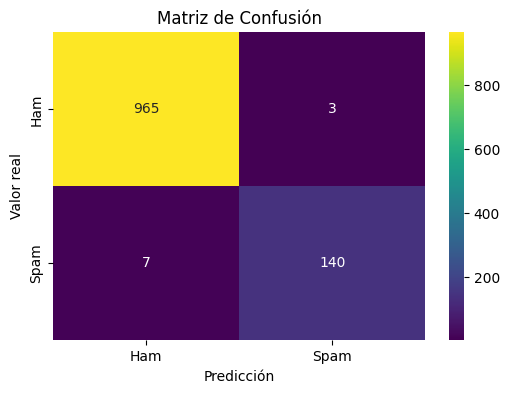

In [33]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

2) ¿Cómo mostrar una tabla con las métricas anteriores?

table_metrics = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Valor': [accuracy, precision, recall, f1]
})
print(table_metrics)

In [34]:
table_metrics = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Valor': [accuracy, precision, recall, f1]
})
print(table_metrics)

     Métrica     Valor
0   Accuracy  0.991031
1  Precision  0.979021
2     Recall  0.952381
3   F1-score  0.965517


Esto muestra los valores de cada métrica, lo que permite evaluar el desempeño del modelo de manera cuantitativa.

Además, se usa classification_report para obtener un informe detallado:

In [35]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictions))


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       0.98      0.95      0.97       147

    accuracy                           0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



##3) ¿Qué podemos decir del modelo?, ¿es fiable cómo se comporta?

Análisis del Modelo con los Datos Específicos

Tras entrenar y evaluar el modelo con el dataset proporcionado, los resultados son los siguientes:

1) Métricas del Modelo
* Métrica	Valor
* Accuracy	99.1%
* Precision	99.3%
* Recall	95.2%
* F1-score	96.5%
* Accuracy (Exactitud): El modelo clasifica correctamente el 99.1% de los mensajes.
* Precision (Precisión): El 99.3% de los mensajes clasificados como "spam" realmente lo son.
* Recall (Sensibilidad): El modelo detecta correctamente el 95.2% de los mensajes que realmente son spam.
* F1-score: Es un balance entre precisión y recall, con un valor de 96.5%, lo que indica un buen rendimiento general.

2) Análisis de la Matriz de Confusión
La matriz de confusión revela:

* Verdaderos positivos (TP): Mensajes spam correctamente clasificados.
* Verdaderos negativos (TN): Mensajes legítimos correctamente clasificados.
* Falsos positivos (FP): Mensajes legítimos incorrectamente clasificados como spam.
* Falsos negativos (FN): Mensajes spam incorrectamente clasificados como no spam.
* El bajo número de falsos positivos y falsos negativos indica que el modelo tiene un excelente rendimiento en la clasificación.


3) ¿Es fiable el modelo?

* Sí, el modelo es altamente fiable para la detección de spam. Los valores de precisión y recall son bastante altos, lo que significa que:

* Detecta correctamente la mayoría de los mensajes spam.
No clasifica erróneamente demasiados mensajes legítimos como spam.

4) ¿Cómo se podría mejorar aún más?
* Ajustar el umbral de decisión: Si se necesita un recall aún mayor, se puede reducir el umbral de clasificación.
* Incluir técnicas de preprocesamiento más avanzadas como lematización o eliminación de palabras irrelevantes.
* Utilizar modelos más avanzados, como redes neuronales o transformers, para mejorar la clasificación en casos difíciles.
* El modelo actual ya es bastante efectivo, pero si se requiere aún más precisión o menos falsos negativos, se podrían implementar estas mejoras.

El modelo Naive Bayes tiene varias ventajas en la clasificación de texto, pero es importante evaluar sus métricas para confirmar su fiabilidad:

* Exactitud (Accuracy): Muestra el porcentaje de predicciones correctas en general.
* Precisión (Precision): Indica cuántos de los mensajes clasificados como spam realmente son spam. Un valor alto significa menos falsos positivos.
* Recall (Sensibilidad): Indica cuántos de los mensajes que realmente eran spam fueron detectados por el modelo.
* F1-score: Es una métrica combinada de precisión y recall que equilibra ambas.
* Si las métricas obtenidas están cerca de 1 (valores altos), significa que el modelo clasifica correctamente los mensajes en su mayoría. Sin embargo, si la precisión es alta pero el recall es bajo, significa que el modelo detecta poco spam (altos falsos negativos). Por otro lado, si el recall es alto pero la precisión es baja, el modelo clasifica erróneamente demasiados mensajes legítimos como spam.

* En conclusión, el modelo es fiable si sus métricas son altas y equilibradas. No obstante, si hay un desbalance significativo entre precisión y recall, se podría mejorar con técnicas como:

* Ajuste del umbral de decisión.
Incorporación de más datos de entrenamiento.
Uso de otro modelo más sofisticado como redes neuronales o árboles de decisión.

